# Обработка видео

Инсталляция OpenCV для Python

sudo pip3 install opencv-python

In [1]:
!pip install opencv-python

[Документация](https://docs.opencv.org/4.1.2/d6/d00/tutorial_py_root.html) по OpenCV

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

Все картинки для OpenCV - это массивы numpy и работа с ними ведется соответствующим образом.

[255 255 255]
255


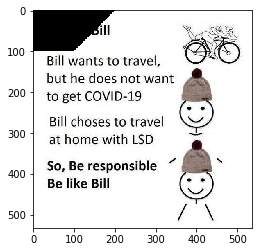

In [3]:
# Читаем картинку из файла.
img = cv2.imread('data/photo_2020-03-17_11-45-56.jpg')
# Выводим пиксель, видим, что он представляет собой список из трех элементов.
px = img[100, 310]
print( px )
# Можно взять любую из составляющих из соответствующего элемента, но надо иметь в виду, что хранится как BGR.
blue = img[100, 310, 0]
print( blue )

# Зарисуем уголок картинки.
for i in range(0, 100):
    for j in range(0, 200-i):
        img[i][j] = (0, 0, 0)

# Скопируем фрагмент.
head = img[125:300, 350:450]
img[300:475, 350:450] = head
#img[100:200, 100,200] = img[150:350, 150:350]

# Для отображения в Matplotlib сконвертируем BGR в RGB.
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.plot()
plt.imshow(img1);

In [4]:
img

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

Попробуем найти на картинке контуры объектов, а потом их огибающие прмоугольники.

In [4]:
# Читаем картинку.
img = cv2.imread('data/confusion-matrix.jpg')
#v2.imread('img/IkBzK.png')
# Конвертируем в оттенки серого, так проще обрабатывать.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Слегка размываем картинку, чтобы тонкие линии стали позаметнее и у них была граница с двух сторон.
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
img_erode = cv2.erode(thresh, np.ones((3, 3), np.uint8), iterations=1)

# Выделяем контуры.
contours, hierarchy = cv2.findContours(img_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Создадим копию картинки и нарисуем на ней прямоугольные контуры.
output = img.copy()

for idx, contour in enumerate(contours):
    (x, y, w, h) = cv2.boundingRect(contour)
    # print("R", idx, x, y, w, h, cv2.contourArea(contour), hierarchy[0][idx])
    # hierarchy[i][0]: the index of the next contour of the same level
    # hierarchy[i][1]: the index of the previous contour of the same level
    # hierarchy[i][2]: the index of the first child
    # hierarchy[i][3]: the index of the parent
    if hierarchy[0][idx][3] == 0:
        cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)

# Отобразим картинку в отдельном окне при помощи средств OpenCV.
cv2.imshow("Input", img)
cv2.imshow("Enlarged", img_erode)
cv2.imshow("Output", output)
# Ждем нажатия клавиши пользователем.
cv2.waitKey(0)
# Закрываем все открытые окна.
cv2.destroyAllWindows()

In [5]:
thresh[100:140, 100:120]

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 2

In [6]:
# В любой непонятной ситуации не забудь удалить все окна.
cv2.destroyAllWindows()

Попробуем работать с видеопотоком. Для этого существует метод VideoCapture, возвращающий объект работы с видеопотоком. 0 означает, что мы работаем с камерой по умолчанию.

In [7]:
# Открываем видеопоток со стандартной камеры.
cap = cv2.VideoCapture(0)

# Будем считать кадры.
cl = 0

while(True):
    # Прочитать очередной кадр frame, если он не прочитался, то в ret будет False.
    ret, frame = cap.read()
    # Превратим картинку в оттенки серого.
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Инвертируем цвета части картинки.
    gray[100:300, 100:300] = 255 - gray[100:300, 100:300]
    cl = (cl + 1) % 256
    # Размоем исходную картинку.
    frame = cv2.GaussianBlur(frame, (25, 25), 0)
    # Выведем номер кадра.
    cv2.putText(frame, str(cl), (50, 50),cv2.FONT_HERSHEY_SIMPLEX, 1, (200, 10, 20), 2)
    # Выведем в окна исходный кадр, и кадр в оттенках серого.
    cv2.imshow('Video', frame)
    cv2.imshow('Frame', gray)
    #print(frame)
    #print(gray)
    # Крутимся в цикле, пока пользователь не нажмет Esc. НАЖМИТЕ ESC!!!
    if cv2.waitKey(1) & 0xFF == 27:
        break
# Отпускаем видеопоток, закрываем все окна. 
# Если из-за ошибки мы сюда не доберемся, это надо сделать вручную, а то придется перезапускать ядро.
cap.release()
cv2.destroyAllWindows()

А теперь попробуем поиграть с кластеризацией изображения.

Сделаем как в прошлый раз - берем кадр, из точки длаем объект с двумя координатами и одним значением цвета в оттенках серого, кластеризуем одним из методов.

Хочу предупредить, программа будет вначале подтормаживать, а потом рассинхронизируеся примерно на 2 секунды, а если отрисовывать каждый кадр, то на больше. Кластеризация заставляет программу работать значительно медленнее. Чтобы ее ускорить, я беру для кластеризации только фрагмент изображения.

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [12]:
# Создаем объект для кластеризации.
db=DBSCAN(eps=4, min_samples=3, n_jobs=4)
#db=KMeans(n_clusters=100, n_jobs=4)

# Видеопоток можно брать из файла.
#cap = cv2.VideoCapture('/home/edward/media/video/yes, prime-minister/Yes Prime Minister 1-1 The Grand Design.avi')
cap = cv2.VideoCapture(0)

# Считаем кадры, чтобы знать какой пропускать.
step = 0

while(True):
    # Читаем кадр.
    ret, frame = cap.read()
    # Возьмем кусочек изображения и сделаем его в оттенках серого.
    roi = frame[100:400, 100:400]
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    #orig = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    orig = roi
    
    # Обрабатываем один кадр из многих, остальные пропускаем.
    step += 1    
    if step > 10 and step%10 == 1:

        # Превращаем точки изображения в одномерный массив точек данных и кластеризуем.
        data = [(c, i, j) for i, row in enumerate(gray) for j, c in enumerate(row)]
        db_clusters=db.fit_predict(data)

        db_clusters = db_clusters * 4
        
        # Превращаем обратно в картинку в оттенках серого. 
        cl300 = db_clusters.reshape(300,300)
        # Если не указать, что числа 8-битные, OpenCV откажется ее отрисовывать!
        gray = np.array(cl300, np.uint8)
        # На цветной картинке отметим все точки, которые не были отнесены к какому-нибудь кластеру.
        orig[cl300==-1]=[0, 0, 255]
        # Отрисовываем результат, проверяем не нажал ли пользователь Esc.
        cv2.imshow('Frame', gray)
        cv2.imshow('Frame2', orig)
        if cv2.waitKey(60) & 0xFF == 27:
            break
    # В начале просто отрисовываем неизмененные кадры.
    elif step <= 10:
        cv2.imshow('Frame', gray)
        cv2.imshow('Frame2', orig)
        if cv2.waitKey(60) & 0xFF == 27:
            break
# Отпускаем поток, закрываем окна.
cap.release()
cv2.destroyAllWindows()

Получается медленно. Может быть можно быстрее кластеризовать при помощи встроенных средств OpenCV?

На самом деле, получается не сильно лучше.

In [10]:
#cap = cv2.VideoCapture('/home/edward/media/video/yes, prime-minister/Yes Prime Minister 1-1 The Grand Design.avi')
#cap.set(cv2.CAP_PROP_POS_MSEC, 100000)
cap = cv2.VideoCapture(0)

step = 0
while(True):
    ret, frame = cap.read()
    step += 1
    if step % 5 == 1:
        #roi = frame[100:400, 100:400]
        roi = frame
        # Превращаем картинку в данные.
        Z = np.float32(roi.reshape((-1,3)))
        # Задаем критерий отсечения: разница не больше 1, максимум итераций - 10.
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        # Изменяя этот параметр можно серьезно замедлить работу метода.
        K = 16
        ret,label,center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        # Для отрисовки кластера возьмем не случайные цвета, а цвет его центроида.
        center = np.uint8(center)
        res = center[label.flatten()]
        res2 = res.reshape((roi.shape))
        cv2.imshow('res2',res2)    

        if cv2.waitKey(60) & 0xFF == 27:
            break

cap.release()
cv2.destroyAllWindows()


In [21]:
# В любой непонятной ситуации отпусти видеопоток.
cap.release()
cv2.destroyAllWindows()

Посмотрим как OpenCV умеет сопровождать объекты.

Для этого на первом кадре рассчитывается гистограмма интересующего нас региона, а дальше ищется область с максимально похожей гистограммой. Обработка ведется в цветовой схеме HSV.

In [13]:
cap = cv2.VideoCapture(0)
# take first frame of the video
ret,frame = cap.read()
# setup initial location of window
r,h,c,w = 250,90,400,125  # simply hardcoded the values
track_window = (c,r,w,h)
# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0,180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )
while(1):
    ret ,frame = cap.read()
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv], [0], roi_hist, [0,180], 1)
        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)
        # Draw it on image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv2.imshow('img2',img2)
        if cv2.waitKey(60) & 0xff == 27:
            break
    else:
        break
cv2.destroyAllWindows()
cap.release()

А вот так можно записывать видео, если они вам понравились

In [49]:
# Вот так пишется простое видео
cap = cv2.VideoCapture(0)

width  = cap.get(3) # float
height = cap.get(4) # float
fourcc = cv2.VideoWriter_fourcc(*"MJPG")
out = cv2.VideoWriter('outpy.avi', fourcc, 30,(int(width),int(height))) ## Вот тут может быть последний аргумент 0 если видео без цвета

while(1):
    ret, frame = cap.read()
    frame = cv2.resize(frame, (int(width),int(height))) ## если хотите менять размер меняете height width
    out.write(frame)  # записываем кадр
    cv2.imshow('frame',frame)
    if cv2.waitKey(3) & 0xff == 27:
        break
    
cap.release()
out.release()
cv2.destroyAllWindows()

OpenCV позволяет находить изменяющиеся области, вычитая из них фон. Сам фон плавно меняется, чтобы учитывать изменения изображения.

In [43]:
cap = cv2.VideoCapture(0)

width  = cap.get(3) # float
height = cap.get(4) # float
fourcc = cv2.VideoWriter_fourcc(*"MJPG")
out = cv2.VideoWriter('outpy.avi', fourcc, 30,(int(width),int(height)), 0)  ## 0 знгачит что видео не цветное 

# Создаем объект для вычитания фона, работающий по алгоритму MOG2.
fgbg = cv2.createBackgroundSubtractorMOG2()
#fgbg = cv2.createBackgroundSubtractorKNN()

while(1):
    ret, frame = cap.read()
    # Применяем алгоритм к очередному кадру, получаем маску изменений, отображаем ее.
    frame = cv2.resize(frame, (int(width),int(height)))
    frame = fgbg.apply(frame)
    out.write(frame)
    cv2.imshow('frame',frame)
    if cv2.waitKey(3) & 0xff == 27:
        break
    
cap.release()
out.release()
cv2.destroyAllWindows()

У OpenCV есть несколько алгоритмов вычитания фона.

In [48]:
cap = cv2.VideoCapture(0)
# Ядро для свертки изображения.
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.createBackgroundSubtractorKNN()
#createBackgroundSubtractorGMG()

width  = cap.get(3) # float
height = cap.get(4) # float
fourcc = cv2.VideoWriter_fourcc(*"MJPG")
out = cv2.VideoWriter('outpy.avi', fourcc, 30,(int(width),int(height)), 0) 

while(1):
    ret, frame = cap.read()
    # Получаем маску, ...
    fgmask = fgbg.apply(frame)
    out.write(fgmask)
    # ... сворачиваем ее и отображаем.
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
    cv2.imshow('frame', fgmask)
    if cv2.waitKey(3) & 0xff == 27:
        break
out.release()
cap.release()
cv2.destroyAllWindows()

Работает замечательно до тех пор, пока мы не начнем двигать камеру. Посмотрим как себя ведет этот алгоритм на художественном фильме.

In [50]:
#cap = cv2.VideoCapture('/home/edward/2020-02-06 18-58-06.flv')
# Перематываем на 100 секунд вперед, так как на анимированной заставке всё относительно неплохо.
#cap.set(cv2.CAP_PROP_POS_MSEC, 50000)
cap = cv2.VideoCapture(0)

width  = cap.get(3) # float
height = cap.get(4) # float
fourcc = cv2.VideoWriter_fourcc(*"MJPG")
out = cv2.VideoWriter('outpy.avi', fourcc, 30,(int(width),int(height)), 0) 

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.createBackgroundSubtractorKNN()
#createBackgroundSubtractorGMG()
while(1):
    ret, frame = cap.read()
    if not ret:
        print("problem")
        continue
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    fgmask = fgbg.apply(frame)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
    # Вместо маски будем показывать исходное видео в оттенках серого.
    gray2 = np.where(fgmask==255, gray, np.zeros(gray.shape, np.uint8))
    out.write(gray2)
    cv2.imshow('frame', gray2)
    cv2.imshow('original', frame)
    if cv2.waitKey(1) & 0xff == 27:
        break
        
out.release()
cap.release()
cv2.destroyAllWindows()

Применим к видеопотоку фильтр Собеля.

In [58]:
cap = cv2.VideoCapture(0)

width  = cap.get(3) # float
height = cap.get(4) # float
fourcc = cv2.VideoWriter_fourcc(*"MJPG")
out = cv2.VideoWriter('outpy.avi', fourcc, 30,(int(width),int(height))) ### ОЧЕНЬ ЗАГАДОЧНО ОН ПИШЕТ ТОЛЬКО УГОЛОК

while(1):
    ret, frame = cap.read()
    gx = cv2.Sobel(frame, cv2.CV_32F, 1, 1)
    gx = np.where(gx>(4,4,4), gx, np.zeros(gx.shape, np.uint8))
    cv2.imshow('frame',gx)
    out.write(gx)
    if cv2.waitKey(3) & 0xff == 27:
        break
out.release()  ### Я ТАК И НЕ ПОНЯЛА, ПОЧЕМУ
cap.release()
cv2.destroyAllWindows()

При помощи OpenCV можно распознавать лица. Возьмем подготовленный набор данных и натренируем классификаторы на распознавание лиц и глаз.

In [2]:
face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('data/haarcascade_eye.xml')

Применим соответствующие каскады для распознавания лиц на фото.

In [3]:
img = cv2.imread('data/MIEM_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

А теперь тоже самое для видео.

In [4]:
cap = cv2.VideoCapture(0)
while(1):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    cv2.imshow('frame', frame)
    if cv2.waitKey(3) & 0xff == 27:
        break
cap.release()
cv2.destroyAllWindows()

Трекинг интересных точек.

Выделяются углы, для них контролируется оптический поток.

In [8]:
cap = cv2.VideoCapture(0)
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0,255,(100,3))
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
while(1):
    ret,frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    good_new = p1[st==1]  ### ЛОМАЕТСЯ ЕСЛИ ТОЧКА УШЛА ЗА КРАЙ ЭКРАНА
    good_old = p0[st==1]
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)
    cv2.imshow('frame',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
cv2.destroyAllWindows()
cap.release()